Tiange Chang

Handling Time Series Data & Modeling with an Interaction Term

Part I: Working with Time Series Data

A. Pick any publicly-traded company that trades on the Nasdaq or the NYSE. 

a. What company did you select, and what is its ticker symbol?

I picked Apple. The ticker symbol is AAPL.

B. Go to Yahoo! Finance: finance.yahoo.com. Enter your company’s ticker symbol in the search bar near the top of your screen. Next, click on “Historical Data” and then “Download.” This will automatically download a .csv with one year’s worth of the company’s data onto your computer.

AAPL.csv downloaded

C. Bring the dataset into your environment. For this step, bring the dataset into your environment using read_csv() from pandas -- but now, add some extra parameters to that function: index_col=’Date’ and parse_dates=True.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

AAPL = pd.read_csv('AAPL.csv', index_col = 'Date', parse_dates = True)

a. Use the head() function to explore the variables, and show your results.

In [2]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-26,159.570007,160.449997,156.360001,156.809998,155.905151,76959800
2021-11-29,159.369995,161.190002,158.789993,160.240005,159.315384,88748200
2021-11-30,159.990005,165.520004,159.919998,165.300003,164.346176,174048100
2021-12-01,167.479996,170.300003,164.529999,164.770004,163.819244,152052500
2021-12-02,158.740005,164.199997,157.800003,163.759995,162.815048,136739200


b. Next, call the info() function on your dataset, and show your results.

In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-26 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


D. Is this dataframe indexed by time values? How do you know this?

Yes, the dataframe is indexed by time values because the data involves measurements that contain both numeric values and a meaningful timestamp associated with each of those values.

E. In your Jupyter Notebook, view the index attribute of your time series.

a. Now, view the max and min value of your index attribute.

In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,157.934702,160.124048,155.881151,158.076746,157.526930,9.087565e+07
std,12.867185,12.687927,12.900898,12.797039,12.588204,2.628940e+07
min,130.070007,132.389999,129.039993,130.059998,129.664490,2.622796e+07
25%,147.162502,149.747501,145.177502,147.997498,147.885014,7.340735e+07
50%,159.114998,160.855004,155.889999,157.960007,157.473519,8.638125e+07
75%,169.232502,171.057503,167.220001,168.970005,168.350849,1.024875e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.954327e+08


In [5]:
AAPL.loc[AAPL['Close'] == 182.009995]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959747,104487900


In [6]:
AAPL.idxmax()

Open        2022-01-04
High        2022-01-04
Low         2022-01-04
Close       2022-01-03
Adj Close   2022-01-03
Volume      2021-12-17
dtype: datetime64[ns]

In [7]:
AAPL.loc[AAPL['Close'] == 130.059998]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-16,132.080002,132.389999,129.039993,130.059998,129.66449,108123900


In [8]:
AAPL.idxmin()

Open        2022-06-17
High        2022-06-16
Low         2022-06-16
Close       2022-06-16
Adj Close   2022-06-16
Volume      2022-11-25
dtype: datetime64[ns]

b. Now, view the argmax and argmin values of your index attribute.

In [9]:
np.argmax(AAPL)

95

In [10]:
np.argmin(AAPL)

836

c. What do the results of max, min, argmax, and argmin represent?

The max & min showed the date of the max & min value. 

The argmax & argmin showed the position of the index of the max & min value. 

F. Let’s visualize the entire time series.

a. First, just call .plot() on your dataframe object.

<AxesSubplot:xlabel='Date'>

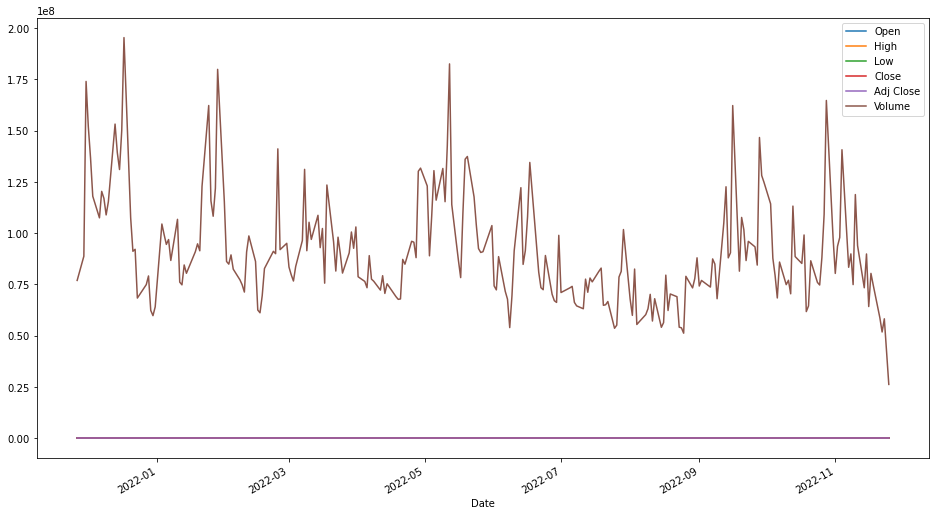

In [11]:
AAPL.plot(figsize = (16, 9))

i. Describe what you see here. Why is this a challenging graph to interpret? What would make it easier to understand?

Only Volume has a clear look in the plot. Other variables are overlapped, and showed a straight line. The value of other variables is too small compared to Volume. One way to solve it is to delete Volume and re-plot it. 

b. Now, re-run the .plot() function, but this time, call that function on the ‘Close’ variable only.

<AxesSubplot:xlabel='Date'>

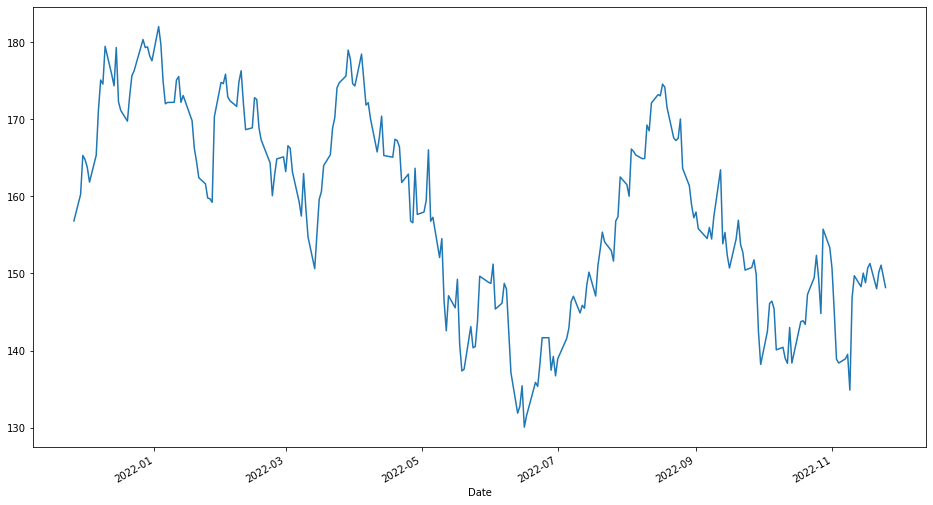

In [12]:
AAPL['Close'].plot(figsize = (16, 9))

i. Now, in a couple of sentences, describe what you see. Why is this graph more easily interpretable than the one you plotted in the previous step?

I see a plot of Apple stock close price from 2021-11 to 2022-11. The lowest price was 130 on 2022-06-16, and the highest price was 182 on 2022-01-03. 

It is more easily interpretable than the previous one because it only has one variable and the plot is clear, with no overlaps. 

c. Plotting a subset of your data 

i. Using a slice operation, plot the daily ‘Close’ variable from your dataset for any one-month period of your choice.

In [13]:
AAPL2 = AAPL.iloc[3:25]
AAPL2.head(22) # data from 2021-12-01 to 2021-12-31

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,167.479996,170.300003,164.529999,164.770004,163.819244,152052500
2021-12-02,158.740005,164.199997,157.800003,163.759995,162.815048,136739200
2021-12-03,164.020004,164.960007,159.720001,161.839996,160.906143,118023100
2021-12-06,164.289993,167.880005,164.279999,165.320007,164.366058,107497000
2021-12-07,169.080002,171.580002,168.339996,171.179993,170.192230,120405400
2021-12-08,172.130005,175.960007,170.699997,175.080002,174.069748,116998900
2021-12-09,174.910004,176.750000,173.919998,174.559998,173.552734,108923700
2021-12-10,175.210007,179.630005,174.690002,179.449997,178.414520,115402700
2021-12-13,181.119995,182.130005,175.529999,175.740005,174.725937,153237000


<AxesSubplot:xlabel='Date'>

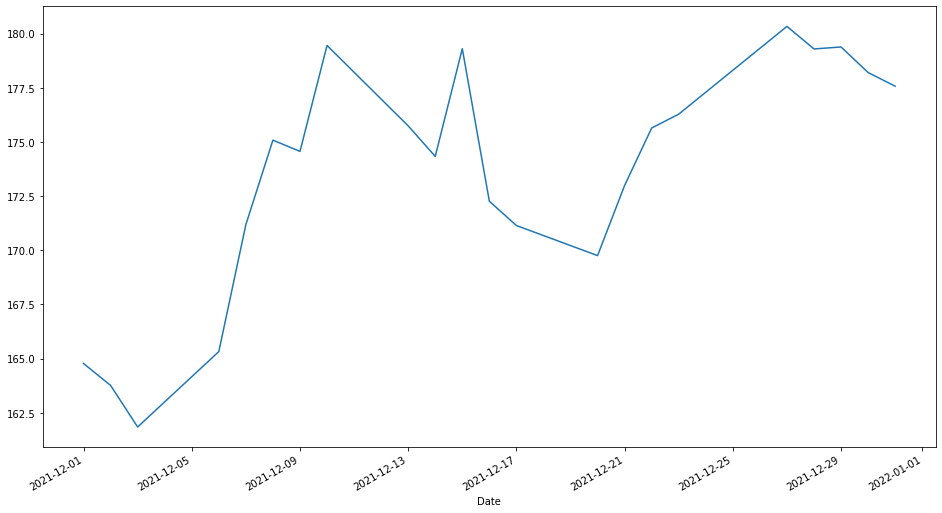

In [14]:
AAPL2['Close'].plot(figsize = (16, 9))

ii. Now, show the plot you drew with the previous step, but with a new figsize, line color, and style

<AxesSubplot:xlabel='Date'>

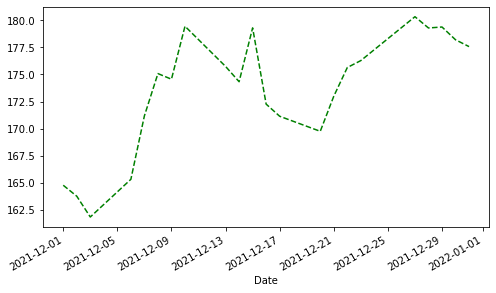

In [15]:
AAPL2['Close'].plot(figsize = (8, 4.5), color = 'green', linestyle = 'dashed')

G. Rolling windows

a. Generate a 3-period moving average for your ‘Close’ variable, and create a plot that overlays this 3-period average atop the actual daily closingprices.

In [16]:
AAPL.rolling(window = 3).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-26,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-29,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30,159.643336,162.386668,158.356664,160.783335,159.855570,1.132520e+08
2021-12-01,162.279999,165.670003,161.079997,163.436671,162.493601,1.382829e+08
2021-12-02,162.070002,166.673335,160.750000,164.610001,163.660156,1.542799e+08
...,...,...,...,...,...,...
2022-11-18,149.289999,151.349996,147.803329,150.266662,150.266662,7.313410e+07
2022-11-21,149.633332,151.516663,147.946665,150.006663,150.006663,7.130270e+07
2022-11-22,150.200002,151.163330,148.206665,149.826660,149.826660,6.177427e+07


<AxesSubplot:title={'center':'3-period moving average'}, xlabel='Date'>

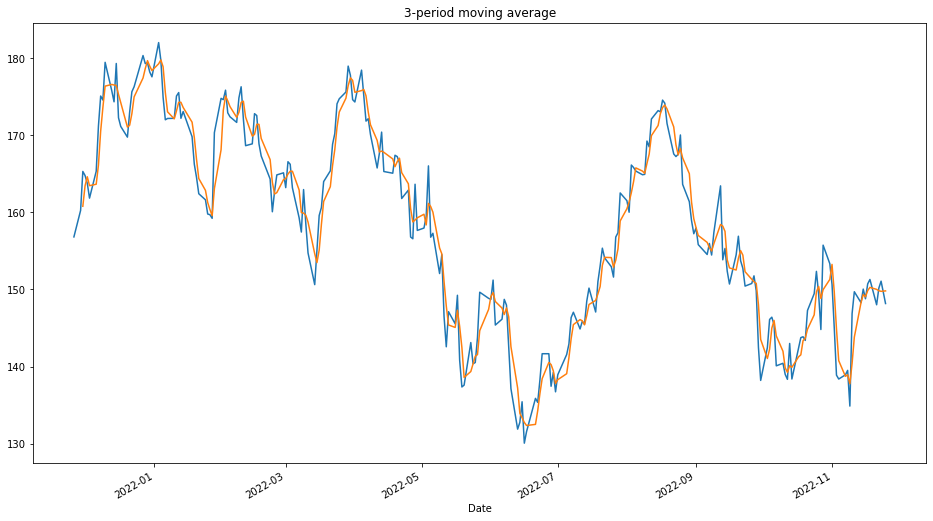

In [17]:
AAPL['Close'].plot(figsize = (16, 9), title = '3-period moving average')
AAPL.rolling(window = 3).mean()['Close'].plot()

b. Next, generate a 30-period moving average for your ‘Close’ variable, and create a plot that overlays this 30-period average atop the actual daily closing prices.

In [18]:
AAPL.rolling(window = 30).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-26,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-29,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-11-18,145.029334,147.417332,142.691333,145.224333,145.072005,8.961405e+07
2022-11-21,145.354001,147.699999,142.996333,145.477333,145.332757,8.907489e+07
2022-11-22,145.628335,148.002332,143.286666,145.850666,145.713762,8.823390e+07


AAPL['Close'].plot(figsize = (16, 9), title = '30-period moving average')
AAPL.rolling(window = 30).mean()['Close'].plot()

c. How are your two moving average plots different from one another? What are some pros and cons of shorter and longer moving average windows?

When we view the results of the 3-day/30-day rolling average function, we will not see results for any of the first two/twenty-nine rows, because there have not yet been enough data points gathered for a three/thirty-day moving average calculation.

The orange line for the three-day moving average, and the blue line for the actual close, show very similar movement in the graph above. 

The thirty-day moving average is showing us a more generalized look.

The pro of longer MA windows is it smooths the data. Day-to-day price swings can be confusing to track and make it difficult to determine a stock’s direction. A moving average smooths out volatility, giving you a better look at how a stock is trending.

The con of longer MA windows is the lag. For example, A 10-day exponential moving average, for instance, will react quickly to price turns, while a 200-day moving average is more sluggish and slower to react to changes. 

The pro of shorter MA windows is the lag is shorter as well. 

The con of shorter MA windows is it is too close to the actual value, and it will not help much. 

Reference:

Ashford, K. (2022, January 19). Pros &amp; Cons of using a moving average to buy stocks. SoFi. Retrieved November 25, 2022, from https://www.sofi.com/learn/content/using-a-moving-average/ 

H. Next, we will try something called resampling.

a. Resample your time series so that its values are based on one-month time periods’ mean values for ‘Close’, rather than daily periods.

In [19]:
AAPL3 = AAPL['Close'].resample('M').mean()
AAPL3.head()

Date
2021-11-30    160.783335
2021-12-31    173.552727
2022-01-31    169.861500
2022-02-28    169.830001
2022-03-31    165.310435
Freq: M, Name: Close, dtype: float64

i. Plot this newly-resampled time series.

<AxesSubplot:xlabel='Date'>

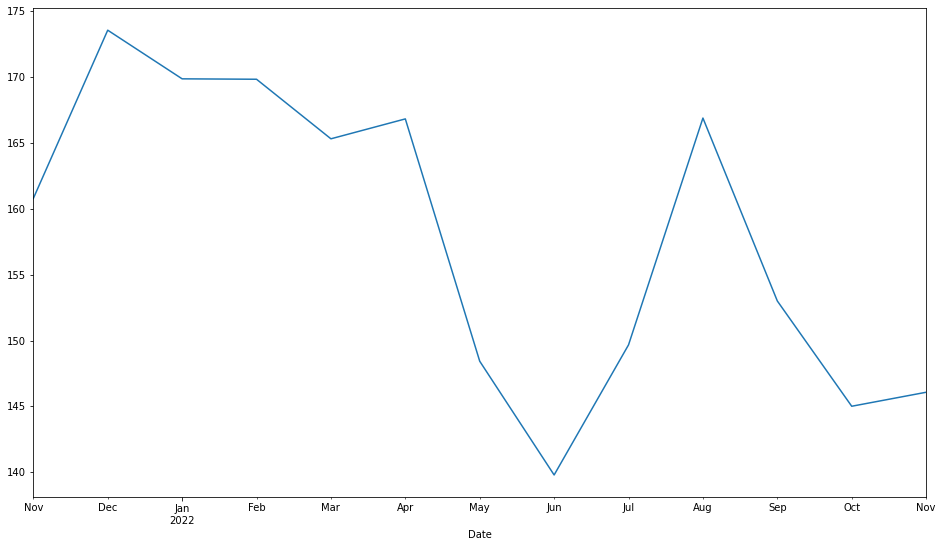

In [20]:
AAPL3.plot(figsize = (16, 9))

ii. Provide an example that explains why someone might care about resampling a time series. To answer this, you may use ANY example that you can think of, or discover, from any field that uses time series data (health, weather, market forecasting, etc.) You don’t need to perform any outside research or go too deeply into domain knowledge here -- 3-4 thoughtful sentences are all you need.

Resample is one way to flexibly define the resolution of the data. My dataset only has one year of the stock price. When plotting a stock price of 5 or 10 years, we might want to reduce the data points, so we can have a more clearer plot. It will be much easier to read and get the information we need.

Part II: Marketing Mix Modeling with an Interaction Term

I. After reading the file into your environment, the first question that you will explore here is whether there is any relationship between marketing spending and revenue. 

In [21]:
sd = pd.read_csv('supreme_data.csv')
sd.head()

,period_id,subwayad_spend,instagram_ad_regional_spend,greater_nyc_sales
0,1,0.35,0.61,20.49
1,2,0.34,0.17,16.41
2,3,0.41,0.39,16.39
3,4,0.30,0.38,10.54
4,5,0.31,0.26,9.08


a. To explore this, first create a new variable that shows the total spending. This variable’s value should be the sum of the subway ad spending and the instagram ad spending among Instagram users based in Greater NYC.

In [22]:
SUM = sd['subwayad_spend'] + sd['instagram_ad_regional_spend']
sd.insert(4, 'Sum', SUM)
sd.head()

,period_id,subwayad_spend,instagram_ad_regional_spend,greater_nyc_sales,Sum
0,1,0.35,0.61,20.49,0.96
1,2,0.34,0.17,16.41,0.51
2,3,0.41,0.39,16.39,0.80
3,4,0.30,0.38,10.54,0.68
4,5,0.31,0.26,9.08,0.57


b. Now, find the correlation between this new total spending variable and Sales.

In [23]:
sd.corr()

,period_id,subwayad_spend,instagram_ad_regional_spend,greater_nyc_sales,Sum
period_id,1.000000,-0.037791,0.048573,0.036329,0.038315
subwayad_spend,-0.037791,1.000000,0.023749,0.472231,0.252971
instagram_ad_regional_spend,0.048573,0.023749,1.000000,0.759715,0.973209
greater_nyc_sales,0.036329,0.472231,0.759715,1.000000,0.843819
Sum,0.038315,0.252971,0.973209,0.843819,1.000000


i. What is the correlation between these variables?

The correlation between total spending and sales is 0.843819.

ii. What does this correlation suggest about the relationship between total marketing spending and sales?

It suggested that there is a strong correlation between total spending and sales. 

c. Next, let’s explore the relationship among the subway ad spending & the instagram ad spending. Examine the correlation among these two variables.

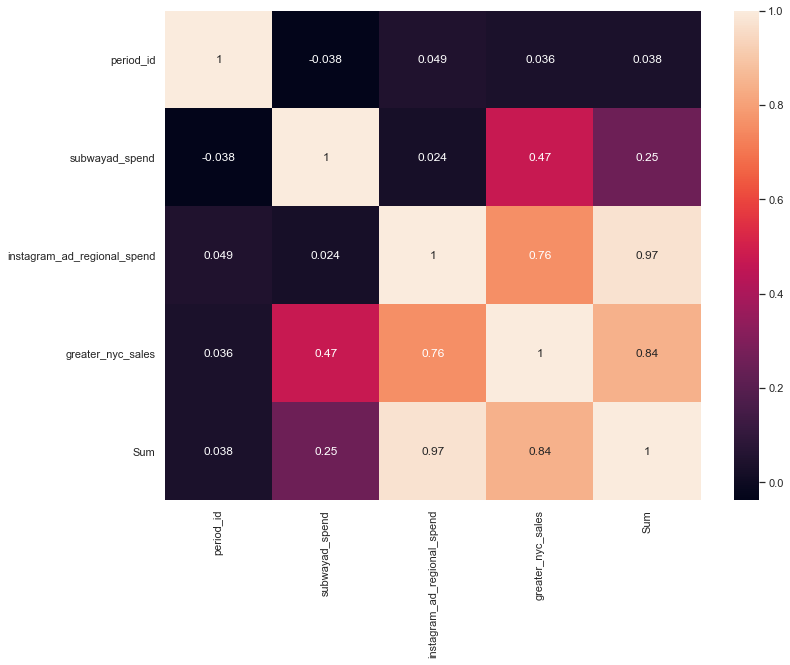

In [24]:
import matplotlib.pyplot as plt

corr_matrix = sd.corr()
sns.set(rc = {'figure.figsize':(12, 9)}) 
sns.heatmap(corr_matrix, annot = True) 
plt.show()

i. Is this correlation so high that we might not be able to use them together in a linear model?

No, the correlation is low: 0.024. 

d. Now, build a model that uses sales as the outcome variable, with subway ad spending and regional instagram ad spending as the input variables. Use the statsmodels library for this step, and all of the remaining steps here. 

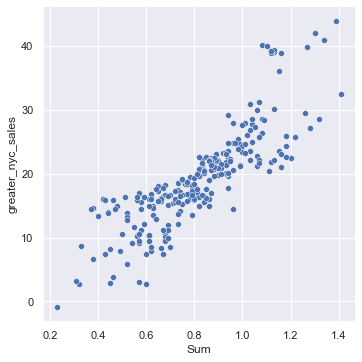

In [25]:
sns.relplot(x = 'Sum', y = 'greater_nyc_sales', data = sd)

In [26]:
# Method 1

import statsmodels.api as sm

X = sd[['subwayad_spend', 'instagram_ad_regional_spend']]
y = sd['greater_nyc_sales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      greater_nyc_sales   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     447.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           8.16e-83
Time:                        01:13:44   Log-Likelihood:                -672.09
No. Observations:                 250   AIC:                             1350.
Df Residuals:                     247   BIC:                             1361.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [27]:
# Method 2

import statsmodels.formula.api as smf

model1 = smf.ols('greater_nyc_sales ~ subwayad_spend + instagram_ad_regional_spend', 
        data = sd).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      greater_nyc_sales   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     447.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           8.16e-83
Time:                        01:13:44   Log-Likelihood:                -672.09
No. Observations:                 250   AIC:                             1350.
Df Residuals:                     247   BIC:                             1361.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -17.1013      1.642    -10.412      0.000     -20.336     -13.866
subwayad_spend                 67.5877      4.404     15.348      0.000      58.914      76.261
instagram_ad_regional_spend    26.4707      1.047     25.293      0.000      24.409      28.532
==============================================================================
Omnibus:                        8.697   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               13.043
Skew:                           0.204   Prob(JB):                      0.00147
Kurtosis:                       4.042   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. What is the p-value of the F-Statistic for this model? What does this suggest about the model?

p-value: 0, F-statistic: 447.1

"F statistic also known as F value is used in ANOVA and regression analysis to identify the means between two populations are significantly different or not."

The model’s F-statistic tells us that there is a meaningful relationship here between the response variable and our inputs as a group.  The very low p-values for subwayad_spend and instagram_ad_regional_spend indicate a high significance level for these independent variables.

Reference

Hessing, T. (2021, June 23). F distribution, F statistic, F Test. Six Sigma Study Guide. Retrieved November 26, 2022, from https://sixsigmastudyguide.com/f-distributionf-statistic-f-test/ 

ii. What are the p-values for each of the individual predictors used in this model? What does this suggest about these predictors?

The p-values for each of the individual predictors are 0. 
 
The very low p-values for subwayad_spend and instagram_ad_regional_spend indicate a high significance level for these independent variables. It suggest our model is good, so we do not need to build a new model without variable's p-value greater than 0.05. 

e. Build yet another model -- this time, you will again use Sales as the outcome variable. Your inputs will be subway ad spending, regional instagram ad spending, and an interaction term based on the relationship between subway ad spending and regional instagram ad spending.

In [28]:
model2 = smf.ols('greater_nyc_sales ~ subwayad_spend + instagram_ad_regional_spend + subwayad_spend : instagram_ad_regional_spend', 
                data = sd).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      greater_nyc_sales   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     314.2
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           7.97e-84
Time:                        01:13:44   Log-Likelihood:                -666.49
No. Observations:                 250   AIC:                             1341.
Df Residuals:                     246   BIC:                             1355.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -6.1062      3.650     -1.673      0.096     -13.296       1.084
subwayad_spend                                36.5748     10.199      3.586      0.000      16.486      56.664
instagram_ad_regional_spend                    2.3102      7.272      0.318      0.751     -12.013      16.634
subwayad_spend:instagram_ad_regional_spend    68.0357     20.274      3.356      0.001      28.104     107.968
==============================================================================
Omnibus:                        4.362   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                5.693
Skew:                          -0.010   Prob(JB):                       0.0581
Kurtosis:                       3.739   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. What do you notice about the p-values for each of these predictors? Should you keep all these terms together in one model?

The p-value for Intercept is: 0.096

The p-value for subwayad_spend is: 0.000

The p-value for instagram_ad_regional_spend is: 0.751

The p-value for the interaction term is: 0.001

The interaction term is significant. We will keep the main effects of subwayad_spend and instagram_ad_regional_spend in the model becasue of the hierarchical principle.  

ii. Demonstrate what your model would predict for a marketer using 100 units of subway ad spending and 100 units of regional instagram ad spending. What sales outcome should this marketer expect to see? How does this number compare to the one that the previous model (with no interaction term) would have predicted?

In [29]:
model2.params

Intercept                                     -6.106214
subwayad_spend                                36.574831
instagram_ad_regional_spend                    2.310175
subwayad_spend:instagram_ad_regional_spend    68.035688
dtype: float64

In [30]:
-6.106214 + 100 * 36.574831 + 100 * 2.310175 + 68.035688 * 100 * 100

684239.2743859999

In [31]:
model1.params

Intercept                     -17.101285
subwayad_spend                 67.587693
instagram_ad_regional_spend    26.470711
dtype: float64

In [32]:
-17.101285 + 100 * 67.587693 + 100 * 26.470711

9388.739115

For 100 units of subway ad spending and regional instagram ad spending: The model with interaction term will predict greater_nyc_sales of 684239.2743859999. The model without interation term will predict greater_nyc_sales of 9388.739115. The number with interaction term is way larger than the one without it.

iii. In a few sentences, how do you interpret this interaction effect? What is this effect showing us? (no statistical jargon is required here, but this should make sense to someone who knows about marketing, but not about how to interpret a linear model).

This interaction effect is a good example of underestimation of prediction. Combining both subwayad_spend and instagram_ad_regional_spend together we could have a much better greater_nyc_sales. Our first model prediction used these two variables as individuals. However, they are interacting with each other.

f. Find an example, or make up an example, of an interaction term in a model (this can be from the world of marketing, or from anywhere else). A very good answer to the last part of this question will include some genuine reaction from you -- finding an example of an interaction effect is only a ‘half-credit’ answer here.

I will use playing basketball as an example. If you want to become a better basketball player, you need both skill training and lifting. These two together are an interaction term that will help you to become a better basketball player. If you only train for skill, you will lose muscle, and your skill will be better but the ability to take contact and finish after contact will decrease. Your shooting accuracy will also decrease becasue you gained more muscle. If you only do weight training, you will get stronger but your agility and skill will decrease. 

i. In a 3-5 sentence paragraph describe what you found (or invented). What are the variables that make up this interaction? Is the effect of their interaction on the outcome positive, or negative? How do you feel about the interaction? Does it make sense to you? Or does it surprise you?

The variables are skill training and weight training. These two together will have a positive effect on our outcome variable -- becoming a better basketball player. I feel this interaction every day because I play basketball and want to become a better basketball player. It makes sense to me but does not surprise me, because I have been doing this for a very long time. One interesting thing is these two variables individually will have a negative impact on the outcome variable, but their interaction will have a positive impact on the outcome variable of becoming a better basketball. 